In [2]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import math
import seaborn as sns
os.getcwd()


'C:\\Users\\Ximena\\OneDrive - Universidad de los andes\\Gerencia de proyectos análiticos\\Proyecto'

In [3]:
# os.chdir("C:\\Users\\Ximena\\OneDrive - Universidad de los andes\\Gerencia de proyectos análiticos\\Proyecto\\dfexportado.csv")
df = pd.read_csv("dfexportado.csv")

In [13]:
df.describe

<bound method NDFrame.describe of       REGISTRO  N_ENCUESTA  REGIONAL  PB1  SECTOR  REGION  MUNICIPIO  PDET  \
0         1877      764678         5    1     526       5          8     2   
1         1885      900989         5    1    5002       5         13     2   
2         1889      968646         5    1    5002       5         13     2   
3         1898      180785         5    1    5006       5         13     2   
4         1901      734690         5    1    5006       5         13     2   
...        ...         ...       ...  ...     ...     ...        ...   ...   
4174      8703      294431         1    1       1       4         32     2   
4175      8723      516103         1    1       1       4         32     2   
4176      8726      405383         1    1       1       4         32     2   
4177      8728      606911         1    1       2       4         32     2   
4178      8730      440739         1    1       2       4         32     2   

      PERSONAS  GENERO  ...  

In [5]:
df.head()

,REGISTRO,N_ENCUESTA,REGIONAL,PB1,SECTOR,REGION,MUNICIPIO,PDET,PERSONAS,GENERO,...,B13_2,B14_1,B14_2,ESTRATO_B26_1,B26_2,B26_11,B26_12,LATITUD_FINAL,LONGITUD_FINAL,nivel_piramide
0,1877,764678,5,1,526,5,8,2,2,2,...,1,8,2.0,3,3,2,2,7.113764,73.136595,1
1,1885,900989,5,1,5002,5,13,2,2,2,...,3,1,2.0,2,2,5,2,7.892407,72.513830,1
2,1889,968646,5,1,5002,5,13,2,2,2,...,1,8,2.0,2,2,3,2,7.892383,72.513792,0
3,1898,180785,5,1,5006,5,13,2,6,2,...,1,6,1.0,1,3,8,2,7.899648,72.535536,0
4,1901,734690,5,1,5006,5,13,2,3,1,...,3,8,1.0,1,1,2,2,7.897977,72.535518,3


Text(0.5, 1.0, 'Faltantes de la base de datos')

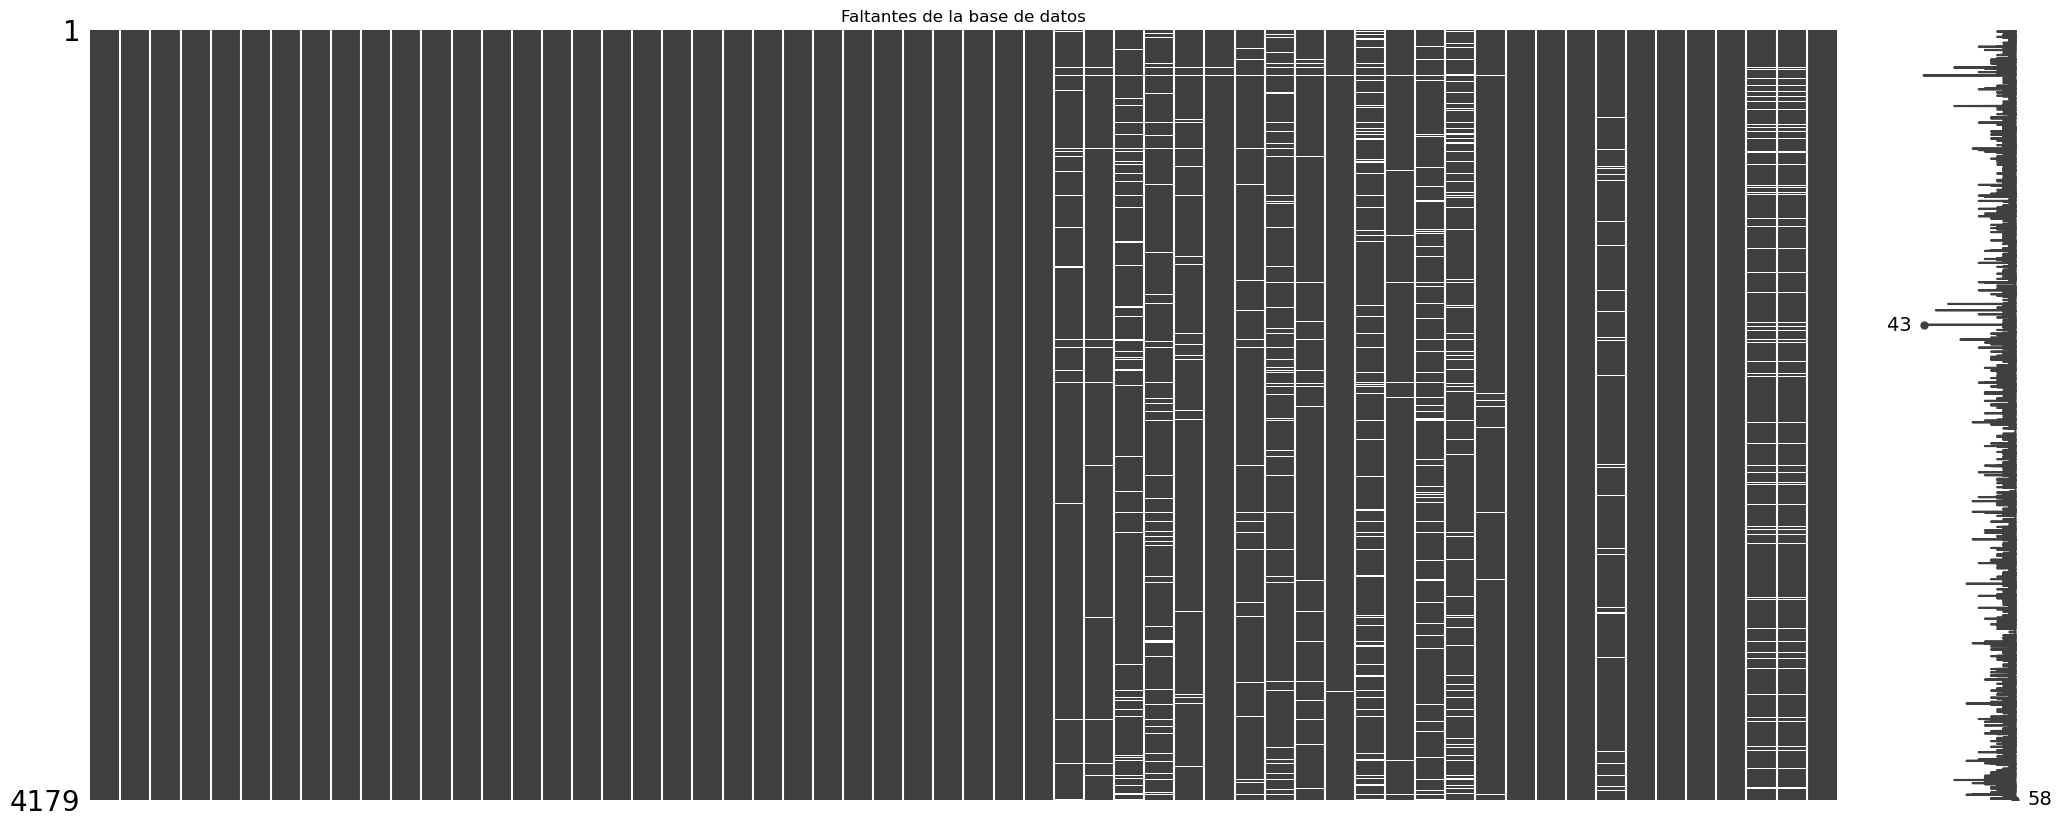

In [6]:
import missingno as msno
#Analizamos los datos faltantes de forma gráfica
msno.matrix(df)
plt.title('Faltantes de la base de datos')

In [7]:
df.columns

Index(['REGISTRO', 'N_ENCUESTA', 'REGIONAL', 'PB1', 'SECTOR', 'REGION',
       'MUNICIPIO', 'PDET', 'PERSONAS', 'GENERO', 'PERSONAS_GEN',
       'PERSONA_SELECCIONADA', 'EDAD', 'REDAD', 'B3_EDAD_1', 'B3_2', 'ST_DEC',
       'ESTRATO', 'ST_GR', 'B4_1', 'B4_2', 'B8_1_1', 'B8_1_2', 'B8_1_3',
       'B8_1_4', 'B8_1_5', 'B8_1_6', 'B8_1_7', 'B8_1_8', 'B8_1_9', 'B9_1',
       'B9_7', 'B10_11_2', 'B10_11_3', 'B10_11_4', 'B10_11_5', 'B10_11_6',
       'B10_11_7', 'B10_11_8', 'B10_11_9', 'B10_11_10', 'B10_11_19',
       'B10_11_20', 'B10_11_21', 'B10_11_22', 'B10_11_24', 'B10_11_25',
       'B13_1', 'B13_2', 'B14_1', 'B14_2', 'ESTRATO_B26_1', 'B26_2', 'B26_11',
       'B26_12', 'LATITUD_FINAL', 'LONGITUD_FINAL', 'nivel_piramide'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4179 entries, 0 to 4178
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   REGISTRO              4179 non-null   int64  
 1   N_ENCUESTA            4179 non-null   int64  
 2   REGIONAL              4179 non-null   int64  
 3   PB1                   4179 non-null   int64  
 4   SECTOR                4179 non-null   int64  
 5   REGION                4179 non-null   int64  
 6   MUNICIPIO             4179 non-null   int64  
 7   PDET                  4179 non-null   int64  
 8   PERSONAS              4179 non-null   int64  
 9   GENERO                4179 non-null   int64  
 10  PERSONAS_GEN          4179 non-null   int64  
 11  PERSONA_SELECCIONADA  4179 non-null   int64  
 12  EDAD                  4179 non-null   int64  
 13  REDAD                 4179 non-null   int64  
 14  B3_EDAD_1             4179 non-null   int64  
 15  B3_2                 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_dataframe(df, min_freq=0.05):
    # Separar las variables numéricas y categóricas
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    # Gráficos de variables numéricas (histogramas)
    if len(numeric_cols) > 0:
        num_rows = int(np.ceil(np.sqrt(len(numeric_cols))))
        num_cols = int(np.ceil(len(numeric_cols) / num_rows))
        
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
        fig.suptitle('Histogramas de Variables Numéricas', fontsize=16)
        axes = axes.flatten()
        
        for i, col in enumerate(numeric_cols):
            axes[i].hist(df[col].dropna(), bins=15, color='slategray', edgecolor='grey')
            axes[i].set_title(col, fontsize=12)
            axes[i].set_xlabel('Valor', fontsize=10)
            axes[i].set_ylabel('Frecuencia', fontsize=10)
        
        for i in range(len(numeric_cols), len(axes)):
            fig.delaxes(axes[i])  # Eliminar ejes no usados
            
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    # Gráficos de variables categóricas (gráficos de pie en una cuadrícula de 2 columnas)
    if len(categorical_cols) > 0:
        num_rows = int(np.ceil(len(categorical_cols) / 2))
        fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))
        fig.suptitle('Gráficos de Variables Categóricas (80% o Más)', fontsize=16)
        axes = axes.flatten()

        for i, col in enumerate(categorical_cols):
            data = df[col].value_counts(normalize=True)  # Calcular proporciones
            data = data[data >= min_freq]  # Filtrar categorías con frecuencia mínima
            data_80 = data[data.cumsum() <= 0.8]  # Filtrar categorías que sumen hasta el 80%
            if data_80.sum() < 0.8:  # Incluir categoría "Otros" si es necesario
                data_80["Otros"] = 1 - data_80.sum()
            
            # Crear gráfico de pie en el eje correspondiente
            axes[i].pie(data_80, labels=data_80.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8})
            axes[i].set_title(col, fontsize=12)
        
        # Eliminar ejes no usados
        for i in range(len(categorical_cols), len(axes)):
            fig.delaxes(axes[i])
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


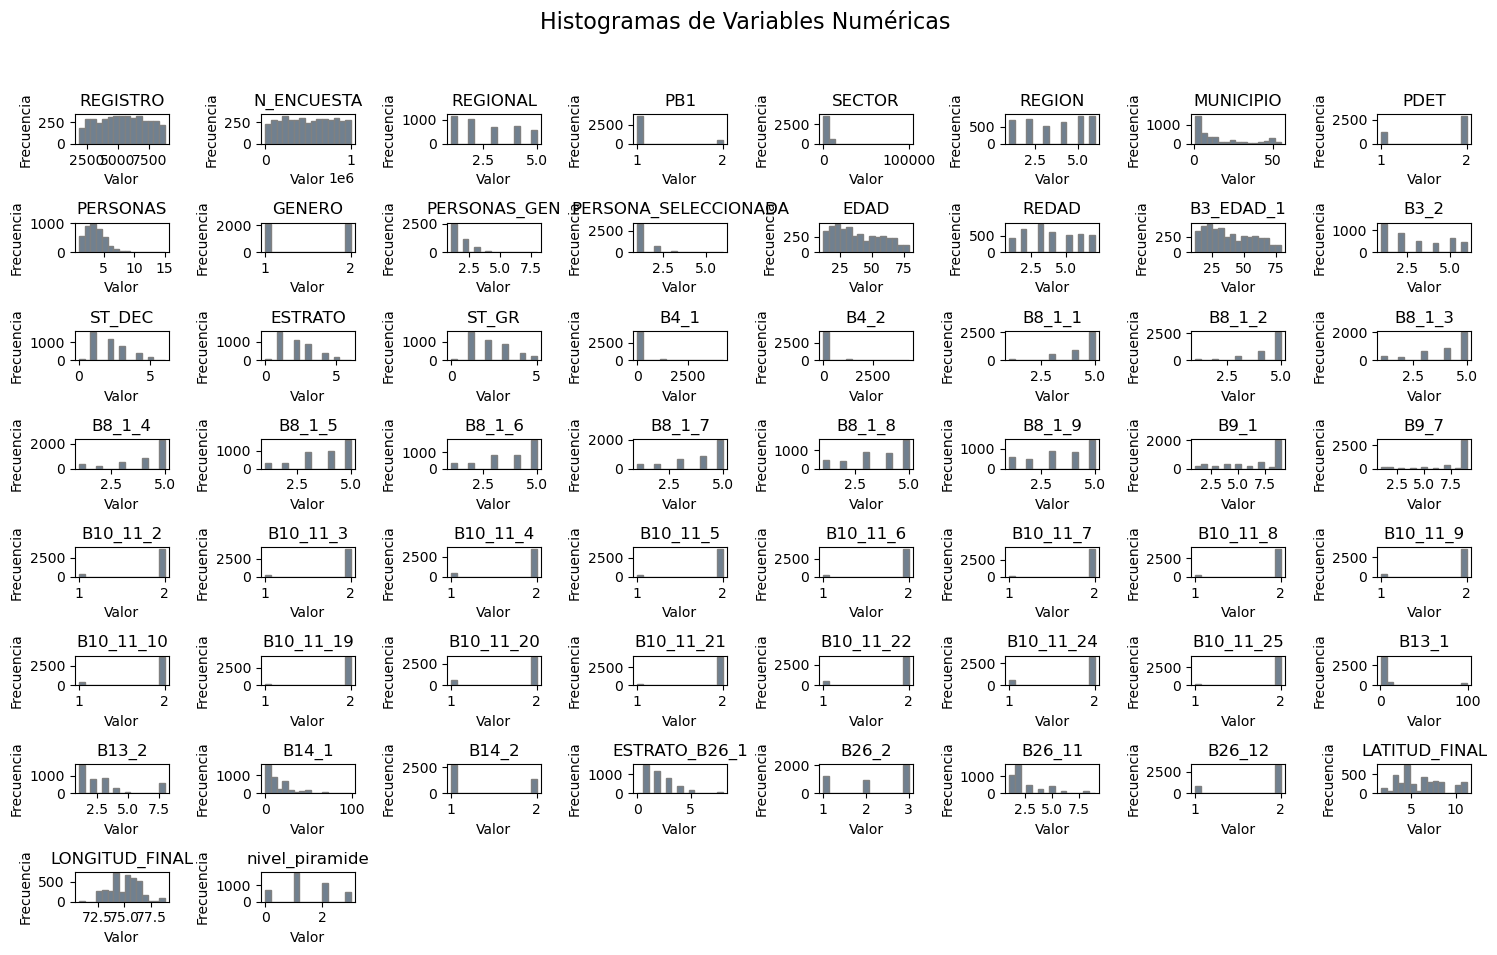

In [9]:
plot_dataframe(df)

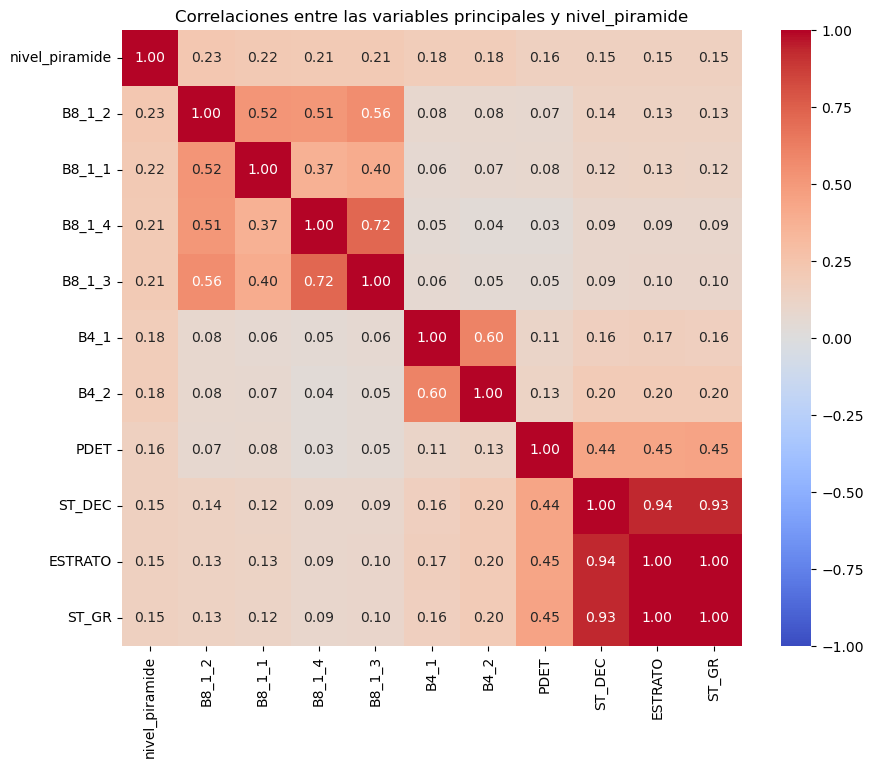

nivel_piramide    1.000000
B8_1_2            0.227874
B8_1_1            0.217377
B8_1_4            0.206178
B8_1_3            0.205433
B4_1              0.184900
B4_2              0.182173
PDET              0.155031
ST_DEC            0.152113
ESTRATO           0.151304
ST_GR             0.150775
Name: nivel_piramide, dtype: float64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular correlaciones entre variables numéricas y 'nivel_piramide'
correlation = df.corr()['nivel_piramide'].sort_values(ascending=False)

# Filtrar las 10 variables más correlacionadas
top_correlated = correlation.head(11).index

# Crear un heatmap de las correlaciones relevantes
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_correlated].corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlaciones entre las variables principales y nivel_piramide")
plt.show()

# Mostrar las 10 variables más correlacionadas con nivel_piramide
correlation.head(11)


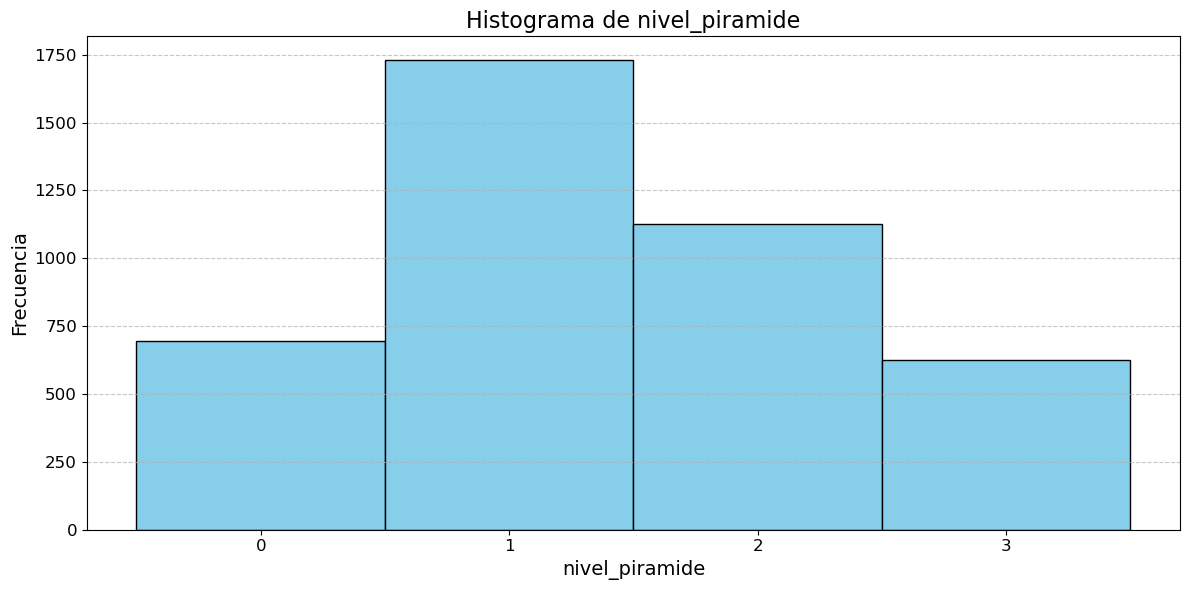

In [18]:

plt.figure(figsize=(12, 6))
plt.hist(df['nivel_piramide'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5], edgecolor='black', color='skyblue')
plt.title('Histograma de nivel_piramide', fontsize=16)
plt.xlabel('nivel_piramide', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks([0, 1, 2, 3], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
df['nivel_piramide'].value_counts()

nivel_piramide
1    1731
2    1126
0     697
3     625
Name: count, dtype: int64

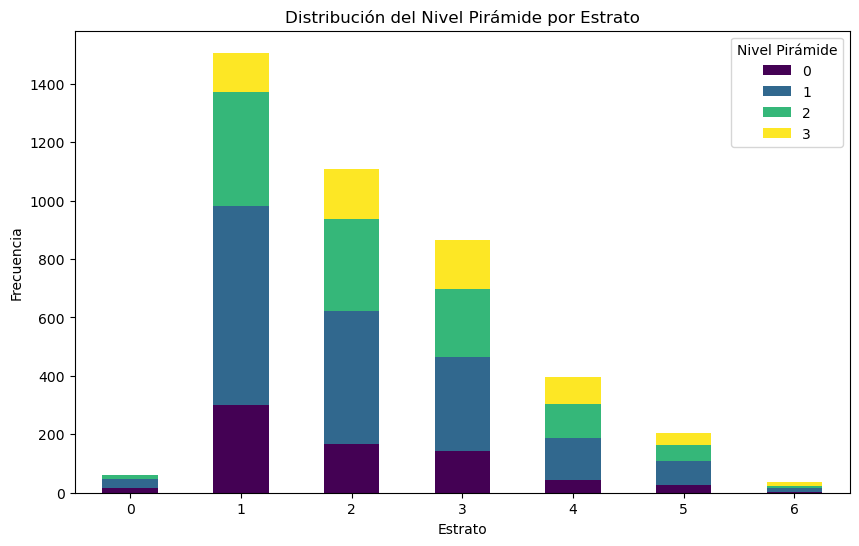

In [20]:
# Crear la tabla cruzada
crosstab = pd.crosstab(df['ESTRATO'], df['nivel_piramide'])

# Generar el gráfico de barras apiladas
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Distribución del Nivel Pirámide por Estrato')
plt.xlabel('Estrato')
plt.ylabel('Frecuencia')
plt.legend(title='Nivel Pirámide')
plt.xticks(rotation=0)
plt.show()

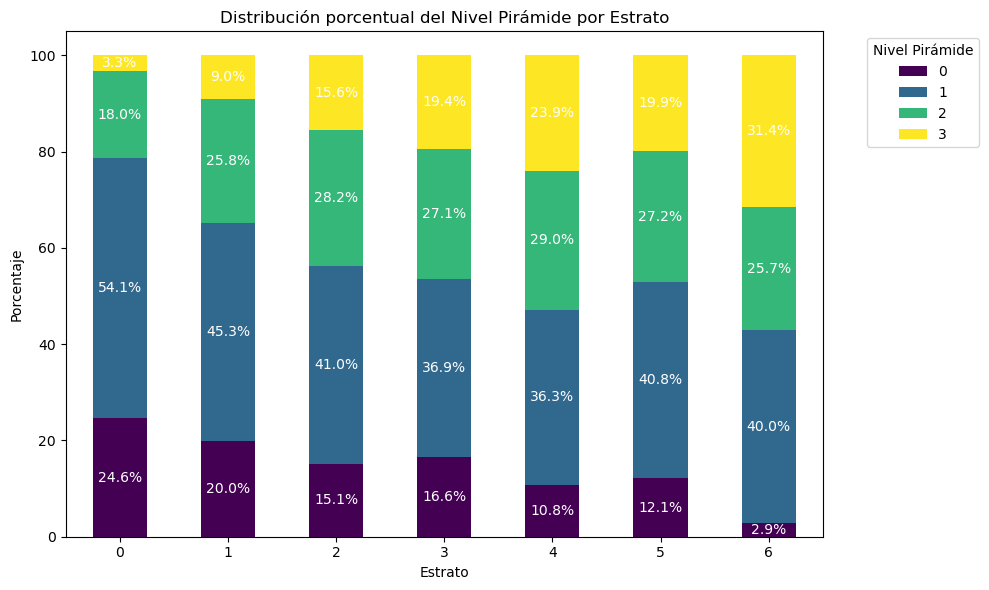

In [21]:

crosstab = pd.crosstab(df['ESTRATO'], df['nivel_piramide'], normalize='index') * 100

ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

for i, row in enumerate(crosstab.values):
    cumulative = 0
    for j, value in enumerate(row):
        cumulative += value
        plt.text(i, cumulative - value / 2, f'{value:.1f}%', ha='center', va='center', color='white', fontsize=10)


plt.title('Distribución porcentual del Nivel Pirámide por Estrato')
plt.xlabel('Estrato')
plt.ylabel('Porcentaje')
plt.legend(title='Nivel Pirámide', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
